# FASTEDDY TUTORIAL VISUALIZATION AND ANALYSIS NOTEBOOK

# 1. Import the tutorial helper-functions from python file

In [1]:
import os, sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import math
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.colors as mcolors
import scipy.fftpack as fftpack
from scipy import interpolate
from fetutorialfunctions import *

In [2]:
check_imports()

matplotlib==3.8.4
netCDF4==1.6.5
numpy==1.26.4
pandas==2.2.2
scipy==1.13.0
xarray==2024.5.0


# 2. Define parameters

In [26]:
##########################
# BEGIN USER EDIT REGION #
##########################
path_base = "INSERT_PATH_TO_YOUR_RUN_DIRECTORY\"
path_end = "/output/"      # FOR EACH CASE, SUBDIRECTORY PATHS TO OUTPUT

save_plot_opt = 0 # 1          # 0-DO NOT SAVE PLOTS, 1-SAVE PLOTS

case = 'convective' # USER SELECTED CASE: 'stable', 'convective', 'neutral', 'canopy', 'offshore', 'dispersion'

if (case=='neutral'):
    zChoose = 100.0 # VERTICAL HEIGHT TO MAKE XY PLOTS
    z_max = 1000.0 # maximum height to plot in the vertical crossections/profiles
    cases_FE = ['Example01_NBL'] # SUBDIRECTORY PATHS TO EACH CASE
    output_base = ["FE_NBL."] # OUTPUT FILE NAMES FOR EACH CASE
    FE_timestep = ['630000'] # FINAL TIME STEPS OF CASES
    FE_timestep_avg = ['540000','555000','570000','585000','600000','615000','630000'] # Output files used for temporal averaging
    path_figure = path_base + cases_FE[0] + '/FIGS/' # BASE PATH TO FIGURES IF save_plot_opt=1
    sizeX_XZ = 22
    sizeY_XZ = 14
    zline_opt = 0
    zline_val = zChoose
elif (case=='convective'):
    zChoose = 500.0 # VERTICAL HEIGHT TO MAKE XY PLOTS
    z_max = 3000.0 # maximum height to plot in the vertical crossections/profiles
    cases_FE = ['Example02_CBL'] # SUBDIRECTORY PATHS TO EACH CASE
    output_base = ["FE_CBL."] # OUTPUT FILE NAMES FOR EACH CASE
    FE_timestep = ['288000'] # FINAL TIME STEPS OF CASES
    FE_timestep_avg = ['216000','228000','240000','252000','264000','276000','288000'] # Output files used for temporal averaging
    path_figure = path_base + cases_FE[0] + '/FIGS/' # BASE PATH TO FIGURES IF save_plot_opt=1
    sizeX_XZ = 20
    sizeY_XZ = 20
    zline_opt = 0
    zline_val = zChoose
elif (case=='stable'):
    zChoose = 50.0 # VERTICAL HEIGHT TO MAKE XY PLOTS
    z_max = 300.0 # maximum height to plot in the vertical crossections/profiles
    cases_FE = ['Example03_SBL'] # SUBDIRECTORY PATHS TO EACH CASE
    output_base = ["FE_SBL."] # OUTPUT FILE NAMES FOR EACH CASE
    FE_timestep = ['8640000'] # FINAL TIME STEPS OF CASES
    FE_timestep_avg = ['7992000','8100000','8208000','8316000','8424000','8532000','8640000'] # Output files used for temporal averaging
    path_figure = path_base + cases_FE[0] + '/FIGS/' # BASE PATH TO FIGURES IF save_plot_opt=1
    sizeX_XZ = 9
    sizeY_XZ = 20
    zline_opt = 0
    zline_val = zChoose
elif (case=='canopy'):
    zChoose = 30.0 # VERTICAL HEIGHT TO MAKE XY PLOTS
    z_max = 300.0 # maximum height to plot in the vertical crossections/profiles
    z_canopy = 30.0
    cases_FE = ['Example05_CANOPY'] # SUBDIRECTORY PATHS TO EACH CASE
    output_base = ["FE_CANOPY."] # OUTPUT FILE NAMES FOR EACH CASE
    FE_timestep = ['1440000'] # FINAL TIME STEPS OF CASES
    FE_timestep_avg = ['1260000','1290000','1320000','1350000','1380000','1410000','1440000'] # Output files used for temporal averaging
    path_figure = path_base + cases_FE[0] + '/FIGS/' # BASE PATH TO FIGURES IF save_plot_opt=1
    sizeX_XZ = 12
    sizeY_XZ = 12
    zline_opt = 1
    zline_val = z_canopy
elif (case=='offshore'):
    zChoose = 500.0 # VERTICAL HEIGHT TO MAKE XY PLOTS
    z_max = 2000.0 # maximum height to plot in the vertical crossections/profiles
    cases_FE = ['Example06_OFFSHORE'] # SUBDIRECTORY PATHS TO EACH CASE
    output_base = ["FE_OFFSHORE."] # OUTPUT FILE NAMES FOR EACH CASE
    FE_timestep = ['360000'] # FINAL TIME STEPS OF CASES
    FE_timestep_avg = ['315000','322500','330000','337500','345000','352500','360000'] # Output files used for temporal averaging
    path_figure = path_base + cases_FE[0] + '/FIGS/' # BASE PATH TO FIGURES IF save_plot_opt=1
    sizeX_XZ = 12
    sizeY_XZ = 12
    zline_opt = 0
    zline_val = zChoose
elif (case=='dispersion'):
    zChoose = 3.0 # VERTICAL HEIGHT TO MAKE XY PLOTS
    zDisper = 30.0 # 65.0 # VERTICAL HEIGHT TO MAKE XY PLOTS
    xDisper = [1400,1750,2000] # [1400,1600,1800,2000]
    z_max = 1000.0 # maximum height to plot in the vertical crossections/profiles
    cases_FE = ['Example07_DISPERSION_SBL'] # SUBDIRECTORY PATH TO THE SBL CASE
    # cases_FE = ['Example07_DISPERSION_CBL'] # SUBDIRECTORY PATH TO THE SBL CASE
    output_base = ["FE_DISPERSION."] # OUTPUT FILE NAMES FOR EACH CASE
    FE_timestep = ['360000'] # FINAL TIME STEPS OF CASES
    FE_timestep_avg = ['300000','330000','360000'] 
    min_c_val = -14
    max_c_val = -6.5
    path_figure = path_base + cases_FE[0] + '/FIGS/' # BASE PATH TO FIGURES IF save_plot_opt=1
    sizeX_XZ = 12
    sizeY_XZ = 12
    zline_opt = 0
    zline_val = zChoose

########################
# END USER EDIT REGION #
########################

# 3. Open files

In [27]:
n_cases = len(cases_FE)
files_FE = []
for cc in range(0,len(cases_FE)):
    files_FE.append(path_base+cases_FE[cc]+path_end+output_base[cc]+FE_timestep[cc])

print('files_FE=',files_FE)

path_figure = path_figure 
if not os.path.exists(path_figure):
    os.makedirs(path_figure)
    
case_open=xr.open_dataset(files_FE[0])

files_FE= ['/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.288000']


In [28]:
case_open

<xarray.Dataset> Size: 3GB
Dimensions:   (zIndex: 122, yIndex: 594, xIndex: 600, time: 1)
Coordinates:
  * zIndex    (zIndex) int32 488B 0 1 2 3 4 5 6 ... 115 116 117 118 119 120 121
  * yIndex    (yIndex) int32 2kB 0 1 2 3 4 5 6 7 ... 587 588 589 590 591 592 593
  * xIndex    (xIndex) int32 2kB 0 1 2 3 4 5 6 7 ... 593 594 595 596 597 598 599
Dimensions without coordinates: time
Data variables: (12/26)
    xPos      (time, zIndex, yIndex, xIndex) float32 174MB ...
    yPos      (time, zIndex, yIndex, xIndex) float32 174MB ...
    zPos      (time, zIndex, yIndex, xIndex) float32 174MB ...
    topoPos   (time, yIndex, xIndex) float32 1MB ...
    rho       (time, zIndex, yIndex, xIndex) float32 174MB ...
    u         (time, zIndex, yIndex, xIndex) float32 174MB ...
    ...        ...
    tskin     (time, yIndex, xIndex) float32 1MB ...
    fricVel   (time, yIndex, xIndex) float32 1MB ...
    htFlux    (time, yIndex, xIndex) float32 1MB ...
    invOblen  (time, yIndex, xIndex) float32 1MB ...
    z0m       (time, yIndex, xIndex) float32 1MB ...
    z0t       (time, yIndex, xIndex) float32 1MB ...

# 4. Plot XY cross sections 

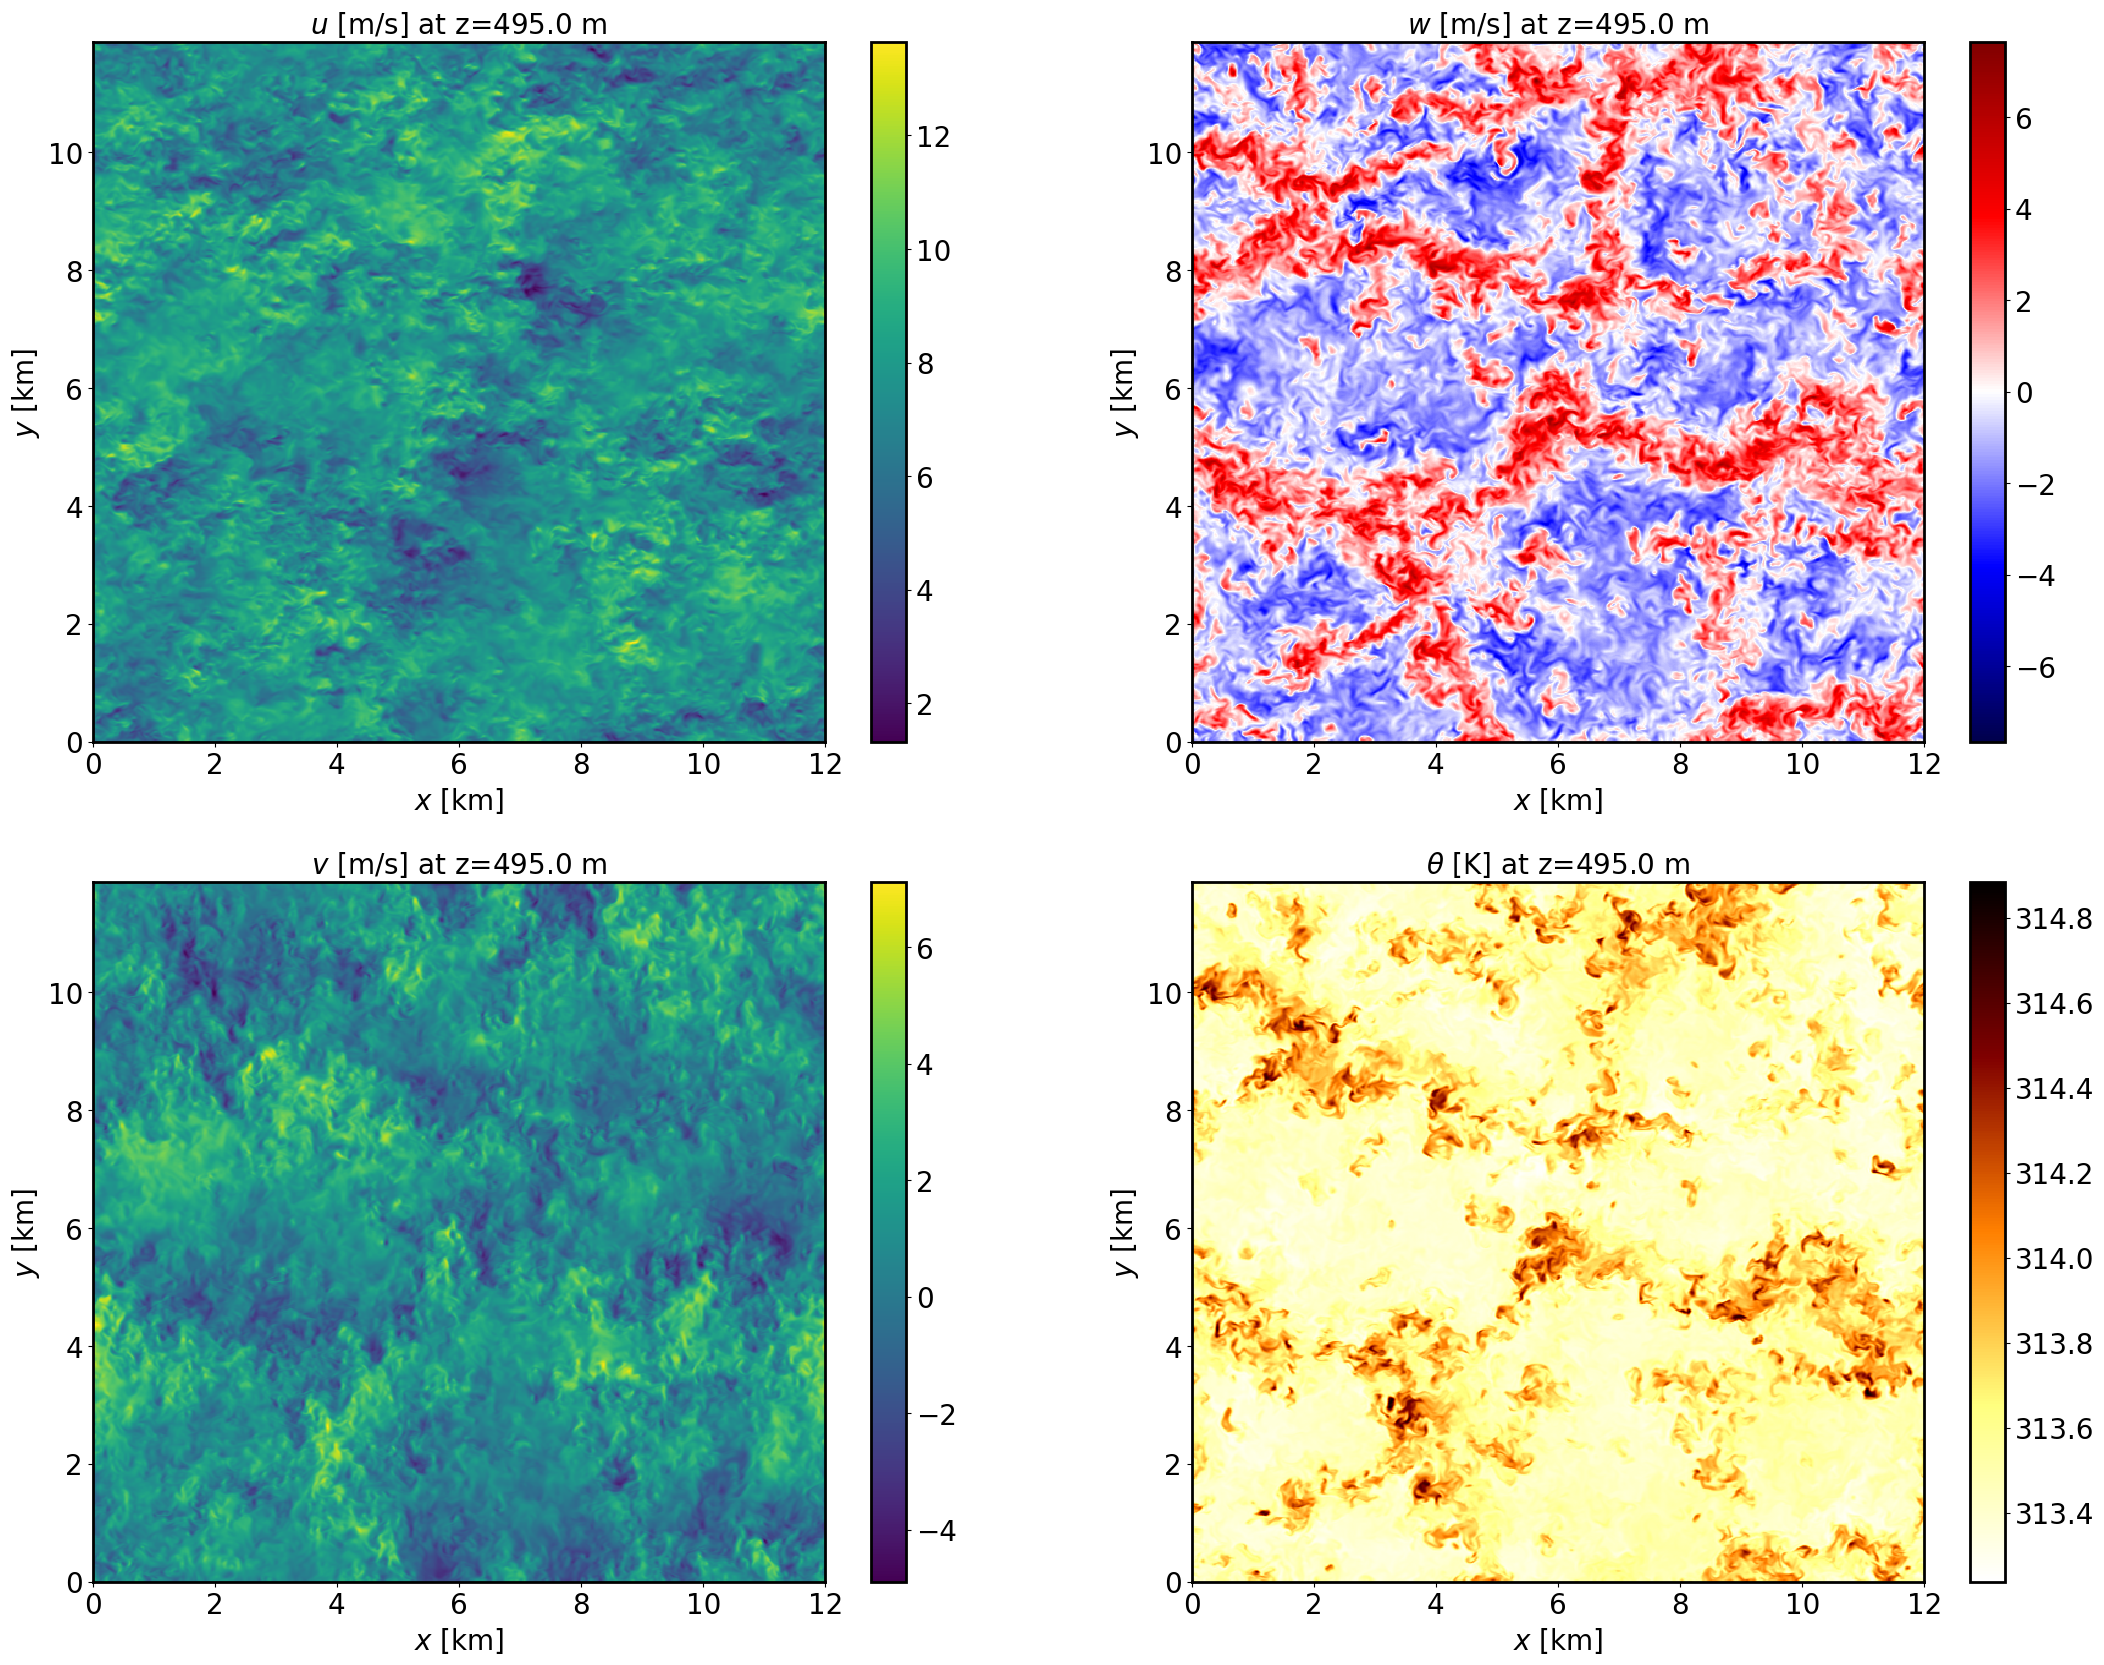

In [29]:
if (case=='offshore'):
    plot_qv_cont = 1
else:
    plot_qv_cont = 0
if (case=='dispersion'):
    plot_u_map = 1
else:
    plot_u_map = 0
plot_XY_UVWTHETA(case, case_open, zChoose, save_plot_opt, path_figure, plot_qv_cont, plot_u_map)

# 5. Plot XZ cross sections 

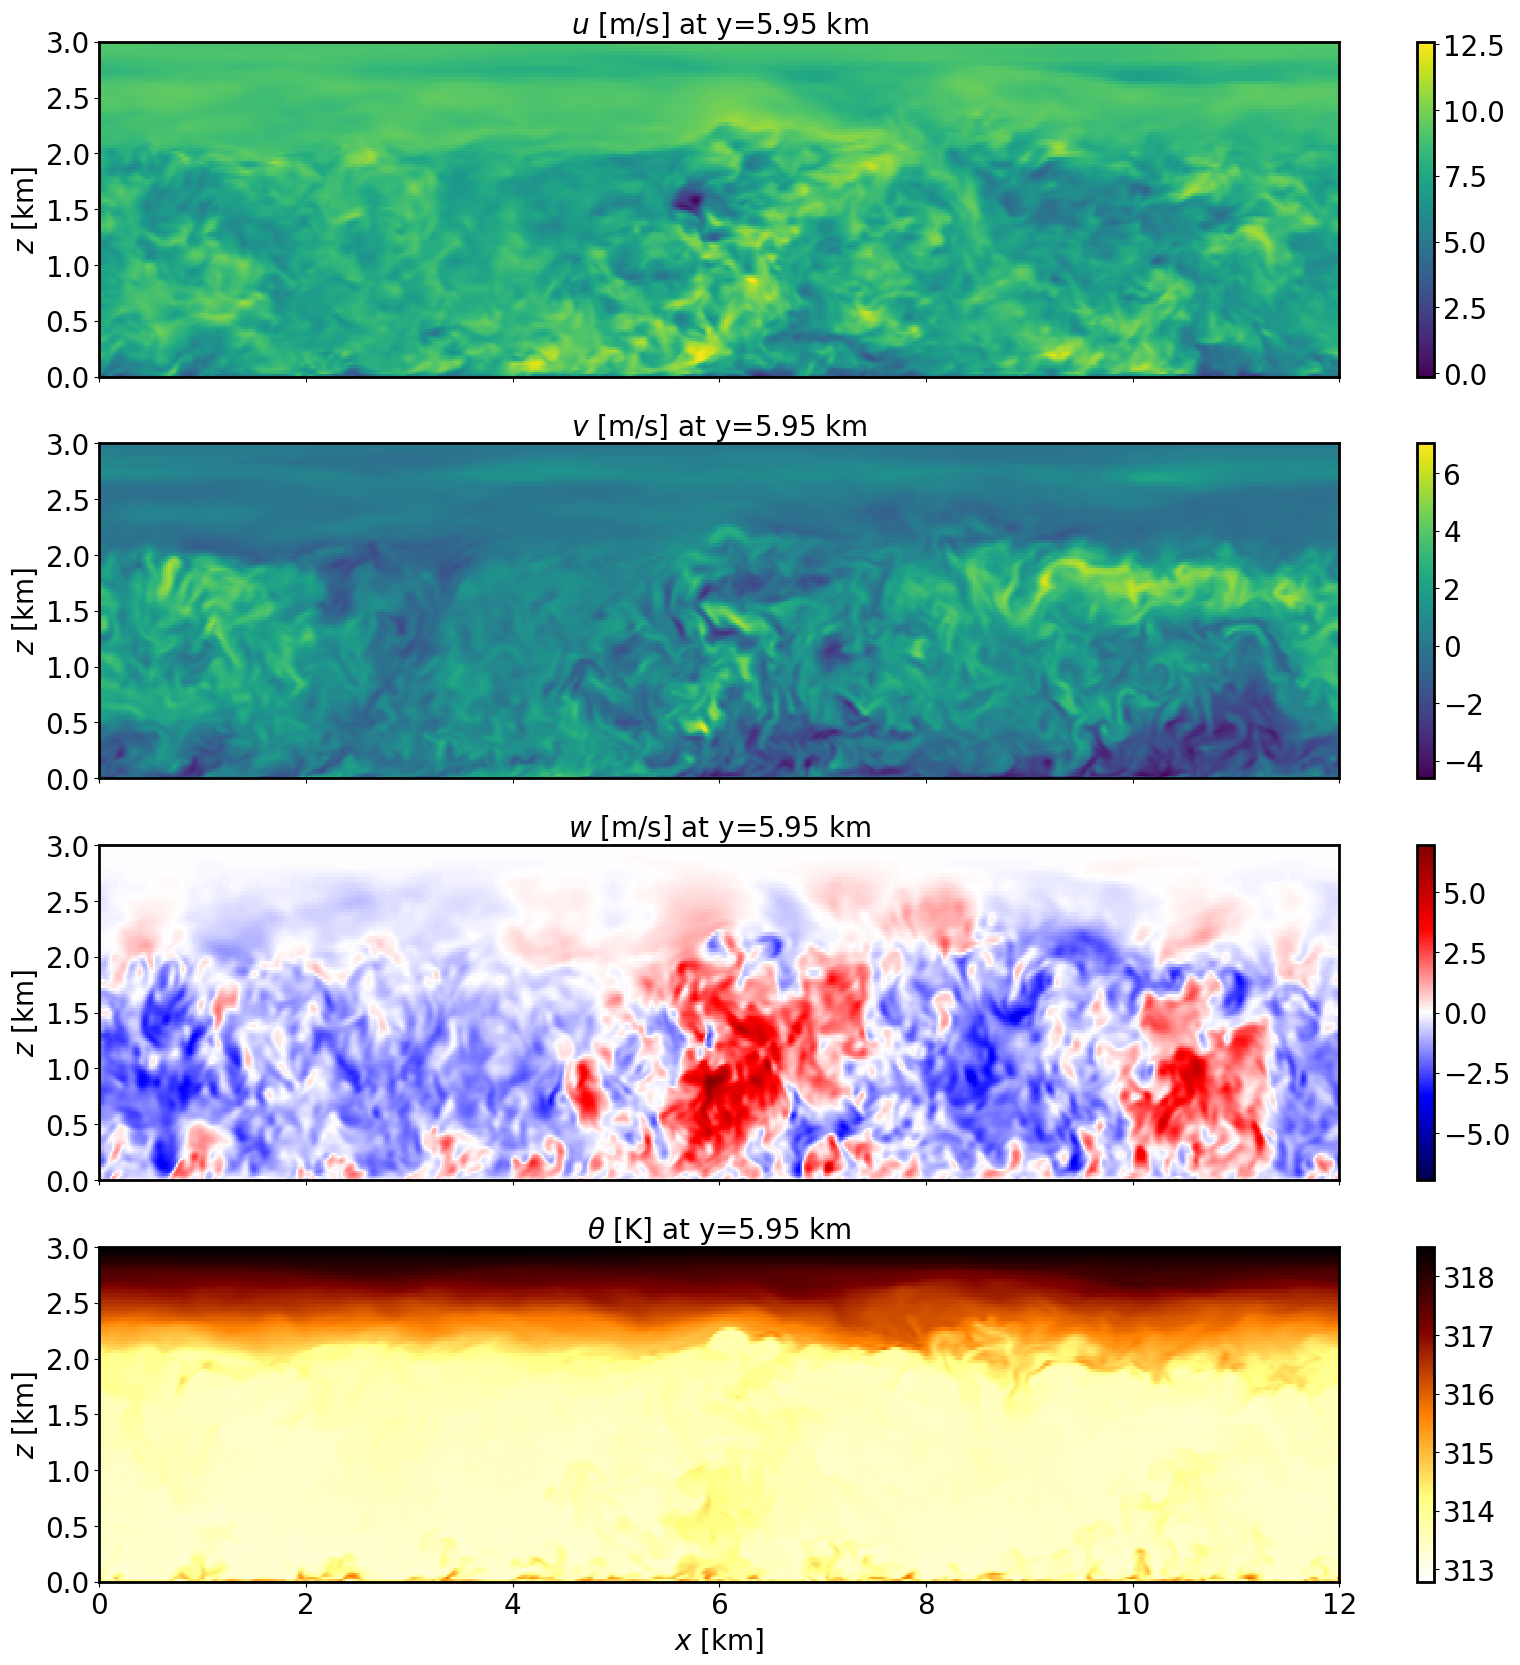

In [30]:
if (case=='offshore'):
    plot_qv_cont = 1
else:
    plot_qv_cont = 0
if (case!='dispersion'):
    plot_XZ_UVWTHETA(case, case_open, z_max, sizeX_XZ, sizeY_XZ, save_plot_opt, path_figure, zline_opt, zline_val, plot_qv_cont)

# 6. Plot mean vertical profiles of state variables

In [31]:
if (case!='dispersion'):
    FE_mean_tmp = compute_mean_profiles(case_open)

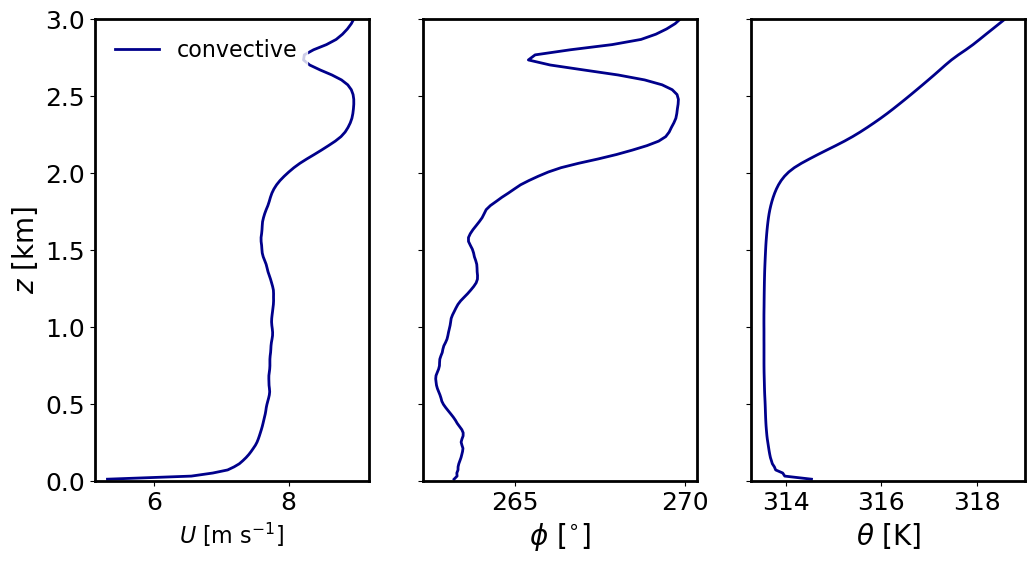

In [32]:
if (case!='dispersion'):
    if (case=='offshore'):
        numPlotsX = 1
        numPlotsY = 4
        sizeX = 16
        sizeY = 6
        fig,axs = plot_figureConfigure(numPlotsX,numPlotsY,sizeX,sizeY,styleFile='./feplot.mplstyle')
        plot_mean_profiles(fig, axs, FE_mean_tmp, z_max, case, save_plot_opt, path_figure, 0, 1)
    else:
        numPlotsX = 1
        numPlotsY = 3
        sizeX = 12
        sizeY = 6
        fig,axs = plot_figureConfigure(numPlotsX,numPlotsY,sizeX,sizeY,styleFile='./feplot.mplstyle')
        plot_mean_profiles(fig, axs, FE_mean_tmp, z_max, case, save_plot_opt, path_figure, 0, 0)

In [33]:
if (case!='dispersion'):
    if (case=='offshore'):
        numPlotsX = 1
        numPlotsY = 2
        sizeX = 10
        sizeY = 4
        fig,axs = plot_figureConfigure(numPlotsX,numPlotsY,sizeX,sizeY,styleFile='./feplot.mplstyle')
        plot_pdfs(fig, axs, case_open, case, save_plot_opt, path_figure)

# 7. Plot mean vertical profiles of turbulent quantities

In [34]:
if (case!='dispersion'):
    FE_turb_tmp=0.0
    for dd in range(0,len(FE_timestep_avg)):
        file_FE_tmp = path_base+cases_FE[0]+path_end+output_base[0]+FE_timestep_avg[dd]
        print(file_FE_tmp)
        FE_turb_xr_tmp = xr.open_dataset(file_FE_tmp)
        if (case=='canopy'):
            FE_turb_tmp = compute_turb_profiles(FE_turb_xr_tmp, FE_turb_tmp, 0)
        else:
            FE_turb_tmp = compute_turb_profiles(FE_turb_xr_tmp, FE_turb_tmp, 1)

/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.216000
/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.228000
/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.240000
/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.252000
/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.264000
/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.276000
/glade/derecho/scratch/domingom/FastEddy/July_release/Example02_CBL/output/FE_CBL.288000


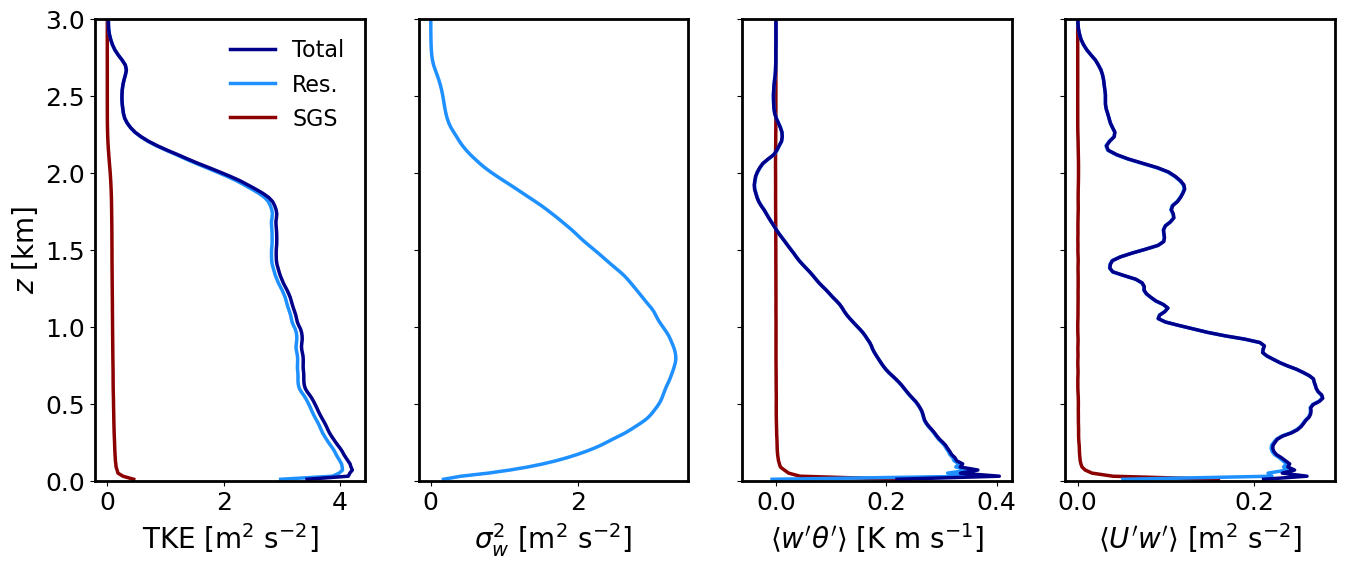

In [35]:
if (case!='dispersion'):
    if (case=='canopy'):
        moist_opt = 0
        numPlotsX = 1
        numPlotsY = 2
        sizeX = 8
        sizeY = 6
        fig,axs = plot_figureConfigure(numPlotsX,numPlotsY,sizeX,sizeY,styleFile='./feplot.mplstyle')
        plot_turb_profiles_canopy(fig, axs, case, FE_mean_tmp, FE_turb_tmp, 3.0*zline_val, zline_val, save_plot_opt, path_figure)
    elif (case=='offshore'):
        moist_opt = 1
        numPlotsX = 1
        numPlotsY = 4
        sizeX = 16
        sizeY = 6
        fig,axs = plot_figureConfigure(numPlotsX,numPlotsY,sizeX,sizeY,styleFile='./feplot.mplstyle')
        plot_turb_profiles(fig, axs, case, FE_turb_tmp, z_max, save_plot_opt, path_figure, moist_opt)
    else:
        moist_opt = 0
        numPlotsX = 1
        numPlotsY = 4
        sizeX = 16
        sizeY = 6
        fig,axs = plot_figureConfigure(numPlotsX,numPlotsY,sizeX,sizeY,styleFile='./feplot.mplstyle')
        plot_turb_profiles(fig, axs, case, FE_turb_tmp, z_max, save_plot_opt, path_figure, moist_opt)

# 8. Plot slices of tracer concentration

In [36]:
if (case=='dispersion'):
    n_cases_t = len(FE_timestep_avg)
    files_FE_t = []
    for cc in range(0,n_cases_t):
        files_FE_t.append(path_base+cases_FE[0]+path_end+output_base[0]+FE_timestep_avg[cc])
    case_open_t = xr.open_mfdataset(files_FE_t,combine='nested',concat_dim='time')

    plot_XY_DISPERSION(case, case_open_t, zDisper, min_c_val, max_c_val, save_plot_opt, path_figure)
    plot_YZ_DISPERSION(case, case_open, xDisper, min_c_val, max_c_val, save_plot_opt, path_figure)